# MNIST Fashion - Keras

In [9]:
import keras
import tensorflow as tf

In [19]:
label_names = ["T-shirt/top", "Trouser", "Pullover",
               "Dress", "Coat", "Sandal", "Shirt",
               "Sneaker", "Bag", "Ankle boot"]

ds_train = keras.utils.image_dataset_from_directory("mnist_fashion/train",
                                                   color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(28, 28))
ds_test = keras.utils.image_dataset_from_directory("mnist_fashion/test",
                                                  color_mode='grayscale',
                                                    batch_size=32,
                                                    image_size=(28, 28))

Found 60000 files belonging to 10 classes.
Found 10000 files belonging to 10 classes.


In [20]:
for x, y in ds_train.take(1): # len(ds_train)
    print(x.shape, y.shape)
    print(y)

x[0]

(32, 28, 28, 1) (32,)
tf.Tensor([3 4 6 5 9 9 7 3 8 2 0 7 7 0 7 4 4 2 3 5 9 9 2 2 5 5 8 3 6 4 6 4], shape=(32,), dtype=int32)


<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [246.],
        [255.],
        [253.],
        [255.],
        [251.],
        [254.],
        [245.],
        [231.],
        [219.],
        [243.],
        [252.],
        [255.],
        [255.],
        [255.],
        [249.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [255.],
        [242.],
        [252.],
        [245.],
        [221.],
        [251.],
        [255.],
        [251.],
        [205.],
        [255.],
        [255.],
        [246.],
        [240.],
        [255.],
        [255.],
        [250.],
        [255.],
        [255.],
        [255.],
        [255.]],

       [[255.],
        [255.],
        [255.],

In [21]:
def preprocess(data, label):
    data = tf.cast(data/255. , tf.float32)
    return data, label
    
ds_train = ds_train.map(preprocess)
ds_test = ds_test.map(preprocess)


In [22]:
for x, y in ds_train.take(1): # len(ds_train)
    print(x.shape, y.shape)
    print(y)

x[0]

(32, 28, 28, 1) (32,)
tf.Tensor([5 9 7 7 9 0 3 3 3 8 1 0 1 2 0 2 9 3 1 1 3 6 1 7 7 4 0 2 6 3 8 8], shape=(32,), dtype=int32)


<tf.Tensor: shape=(28, 28, 1), dtype=float32, numpy=
array([[[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ]],

       [[1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],
        [1.        ],

## Model

In [29]:
input_shape = (28, 28, 1)
num_classes = 10

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dropout_3 (Dropout)         (None, 3136)             

In [24]:
ds_train = ds_train.prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
epochs = 5

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(ds_train, epochs=epochs) # validation_split=0.1

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.5893 - accuracy: 0.7855
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4135 - accuracy: 0.8514
Epoch 3/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3705 - accuracy: 0.8659
Epoch 4/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3469 - accuracy: 0.8751
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.3302 - accuracy: 0.8800


In [26]:
model.evaluate(ds_train)

1875/1875 [==============================] - 24s 13ms/step - loss: 0.2730 - accuracy: 0.9058


[0.2729615867137909, 0.9058333039283752]

In [27]:
model.evaluate(ds_test)

313/313 [==============================] - 23s 70ms/step - loss: 0.3112 - accuracy: 0.8899


[0.31121009588241577, 0.8899000287055969]

In [28]:
history.history

{'loss': [0.5893158912658691,
  0.4135279953479767,
  0.37053829431533813,
  0.3469202220439911,
  0.33017969131469727],
 'accuracy': [0.7855499982833862,
  0.8514333367347717,
  0.8659166693687439,
  0.875083327293396,
  0.879966676235199]}

In [2]:
import matplotlib.pyplot as plt

In [3]:
history = {'loss': [0.7065848708152771,
  0.4580540060997009,
  0.41084355115890503,
  0.38371095061302185,
  0.36021703481674194],
 'accuracy': [0.7491166591644287,
  0.8343333601951599,
  0.8521166443824768,
  0.8623166680335999,
  0.8707833290100098]}


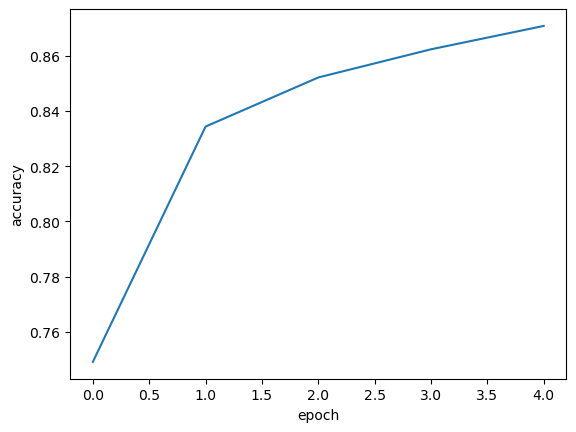

In [4]:
plt.plot(history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

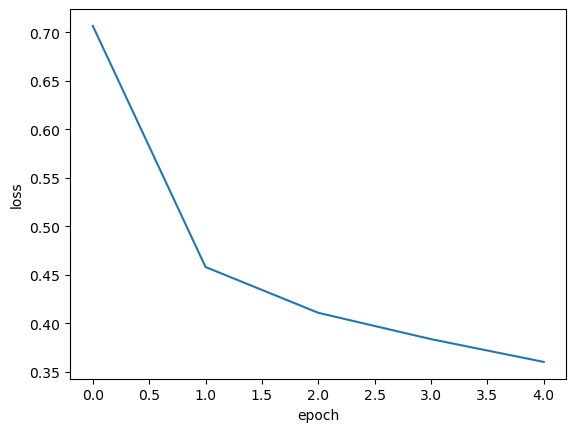

In [5]:
plt.plot(history['loss'])
# plt.plot(history.history['val_accuracy'])
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()